In [1433]:
# fetch screener.in and store data in a panda file
import requests
import pandas as pd
from bs4 import BeautifulSoup


def get_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.text
    else:
        print("Error fetching data from url: ", url)
        return None
    
def get_data_from_screener(url):
    data = get_data(url)
    if data is not None:
        soup = BeautifulSoup(data, 'html.parser')
        table = soup.find_all('table')
        if len(table) > 0:
            df = pd.read_html(str(table))[3]
            return df
        else:
            print("No table found in the page")
            return None
    else:
        return None



In [1434]:
from pyperclip import copy

In [1522]:
company = 'NESTLEIND'

In [1523]:
url = f'https://www.screener.in/company/{company}/'

In [1524]:
resp = requests.get(url)
with open('tcs.html', 'wb') as f:
    f.write(resp.content)

In [1525]:
# resp = None
# with open('tcs.html', 'rb') as f:
#     resp = f.read()

In [1526]:
data = get_data(url)
if data is not None:
    soup = BeautifulSoup(data, 'html.parser')
    table = soup.find_all('table')

In [1527]:
# get company id
company_id = int(soup.find('div', {'id': 'company-info'})['data-company-id'])

In [1528]:
company_id

2236

In [1529]:
table

[<table class="data-table responsive-text-nowrap">
 <thead>
 <tr>
 <th class="text"></th>
 <th class="highlight-cell">Jun 2021</th>
 <th class="">Sep 2021</th>
 <th class="">Dec 2021</th>
 <th class="">Mar 2022</th>
 <th class="highlight-cell">Jun 2022</th>
 <th class="">Sep 2022</th>
 <th class="">Dec 2022</th>
 <th class="">Mar 2023</th>
 <th class="highlight-cell">Jun 2023</th>
 <th class="">Sep 2023</th>
 <th class="">Dec 2023</th>
 <th class="">Mar 2024</th>
 <th class="highlight-cell">Jun 2024</th>
 </tr>
 </thead>
 <tbody>
 <tr class="stripe">
 <td class="text">
 <button class="button-plain" onclick="Company.showSchedule('Sales', 'quarters', this)">
                 Sales <span class="blue-icon">+</span>
 </button>
 </td>
 <td class="highlight-cell">3,477</td>
 <td class="">3,883</td>
 <td class="">3,748</td>
 <td class="">3,993</td>
 <td class="highlight-cell">4,046</td>
 <td class="">4,602</td>
 <td class="">4,257</td>
 <td class="">4,831</td>
 <td class="highlight-cell">4,659

In [1530]:
df = pd.read_html(str(table))[1]

In [1531]:
data = df.to_dict()

In [1532]:
data

{'Unnamed: 0': {0: 'Sales\xa0+',
  1: 'Expenses\xa0+',
  2: 'Operating Profit',
  3: 'OPM %',
  4: 'Other Income\xa0+',
  5: 'Interest',
  6: 'Depreciation',
  7: 'Profit before tax',
  8: 'Tax %',
  9: 'Net Profit\xa0+',
  10: 'EPS in Rs',
  11: 'Dividend Payout %'},
 'Dec 2013': {0: '9101',
  1: '7153',
  2: '1948',
  3: '21%',
  4: '97',
  5: '37',
  6: '330',
  7: '1678',
  8: '33%',
  9: '1117',
  10: '11.59',
  11: '42%'},
 'Dec 2014': {0: '9855',
  1: '7816',
  2: '2039',
  3: '21%',
  4: '87',
  5: '14',
  6: '338',
  7: '1774',
  8: '33%',
  9: '1185',
  10: '12.29',
  11: '51%'},
 'Dec 2015': {0: '8175',
  1: '6620',
  2: '1555',
  3: '19%',
  4: '-391',
  5: '3',
  6: '347',
  7: '814',
  8: '31%',
  9: '563',
  10: '5.84',
  11: '83%'},
 'Dec 2016': {0: '9141',
  1: '7292',
  2: '1850',
  3: '20%',
  4: '140',
  5: '91',
  6: '354',
  7: '1545',
  8: '35%',
  9: '1001',
  10: '10.39',
  11: '61%'},
 'Dec 2017': {0: '10010',
  1: '7913',
  2: '2097',
  3: '21%',
  4: '177',


In [1533]:
compunded_sales_growth = (int(data[list(data)[-2]][0]) / int(data[list(data)[1]][0])) ** (1/11) - 1
compunded_sales_growth *= 100

In [1534]:
compunded_sales_growth

9.377179141984705

In [1535]:
data

{'Unnamed: 0': {0: 'Sales\xa0+',
  1: 'Expenses\xa0+',
  2: 'Operating Profit',
  3: 'OPM %',
  4: 'Other Income\xa0+',
  5: 'Interest',
  6: 'Depreciation',
  7: 'Profit before tax',
  8: 'Tax %',
  9: 'Net Profit\xa0+',
  10: 'EPS in Rs',
  11: 'Dividend Payout %'},
 'Dec 2013': {0: '9101',
  1: '7153',
  2: '1948',
  3: '21%',
  4: '97',
  5: '37',
  6: '330',
  7: '1678',
  8: '33%',
  9: '1117',
  10: '11.59',
  11: '42%'},
 'Dec 2014': {0: '9855',
  1: '7816',
  2: '2039',
  3: '21%',
  4: '87',
  5: '14',
  6: '338',
  7: '1774',
  8: '33%',
  9: '1185',
  10: '12.29',
  11: '51%'},
 'Dec 2015': {0: '8175',
  1: '6620',
  2: '1555',
  3: '19%',
  4: '-391',
  5: '3',
  6: '347',
  7: '814',
  8: '31%',
  9: '563',
  10: '5.84',
  11: '83%'},
 'Dec 2016': {0: '9141',
  1: '7292',
  2: '1850',
  3: '20%',
  4: '140',
  5: '91',
  6: '354',
  7: '1545',
  8: '35%',
  9: '1001',
  10: '10.39',
  11: '61%'},
 'Dec 2017': {0: '10010',
  1: '7913',
  2: '2097',
  3: '21%',
  4: '177',


In [1536]:
data

{'Unnamed: 0': {0: 'Sales\xa0+',
  1: 'Expenses\xa0+',
  2: 'Operating Profit',
  3: 'OPM %',
  4: 'Other Income\xa0+',
  5: 'Interest',
  6: 'Depreciation',
  7: 'Profit before tax',
  8: 'Tax %',
  9: 'Net Profit\xa0+',
  10: 'EPS in Rs',
  11: 'Dividend Payout %'},
 'Dec 2013': {0: '9101',
  1: '7153',
  2: '1948',
  3: '21%',
  4: '97',
  5: '37',
  6: '330',
  7: '1678',
  8: '33%',
  9: '1117',
  10: '11.59',
  11: '42%'},
 'Dec 2014': {0: '9855',
  1: '7816',
  2: '2039',
  3: '21%',
  4: '87',
  5: '14',
  6: '338',
  7: '1774',
  8: '33%',
  9: '1185',
  10: '12.29',
  11: '51%'},
 'Dec 2015': {0: '8175',
  1: '6620',
  2: '1555',
  3: '19%',
  4: '-391',
  5: '3',
  6: '347',
  7: '814',
  8: '31%',
  9: '563',
  10: '5.84',
  11: '83%'},
 'Dec 2016': {0: '9141',
  1: '7292',
  2: '1850',
  3: '20%',
  4: '140',
  5: '91',
  6: '354',
  7: '1545',
  8: '35%',
  9: '1001',
  10: '10.39',
  11: '61%'},
 'Dec 2017': {0: '10010',
  1: '7913',
  2: '2097',
  3: '21%',
  4: '177',


In [1537]:
sales_list = []
for i in range(1, 13):
    sales_list.append(int(data[list(data)[i]][0]))

In [1538]:
expenses_list = []
for i in range(1, 13):
    expenses_list.append(int(data[list(data)[i]][1]))

In [1539]:
opm_percent_list = []
for i in range(1, 13):
    opm_percent_list.append(int(data[list(data)[i]][3][:-1]))


In [1540]:
interest_list = []
for i in range(1, 13):
    interest_list.append(int(data[list(data)[i]][5]))

In [1541]:
depreciation_list = []
for i in range(1, 13):
    depreciation_list.append(int(data[list(data)[i]][6]))

In [1542]:
net_profit_list = []
for i in range(1, 13):
    net_profit_list.append(int(data[list(data)[i]][9]))

In [1543]:
eps = []
for i in range(1, 13):
    eps.append(float(data[list(data)[i]][10]))

In [1544]:
other_assests_url = f'https://www.screener.in/api/company/{company_id}/schedules/?parent=Other+Assets&section=balance-sheet'

other_assests_url_resp = requests.get(other_assests_url)

In [1545]:
cash_equivalents = []
cash_equivalents_data = other_assests_url_resp.json()['Cash Equivalents']
for i in cash_equivalents_data.values():
    cash_equivalents.append(int(i.replace(',', '')))

trade_receivables = []
trade_receivables_data = other_assests_url_resp.json()['Trade receivables']
for i in trade_receivables_data.values():
    try:
        trade_receivables.append(int(i.replace(',', '')))
    except:
        pass



In [1546]:
trade_receivables_data

{'Dec 2013': '84',
 'Dec 2014': '99',
 'Dec 2015': '78',
 'Dec 2016': '98',
 'Dec 2017': '89',
 'Dec 2018': '125',
 'Dec 2019': '124',
 'Dec 2020': '165',
 'Dec 2021': '166',
 'Dec 2022': '192',
 'Dec 2023': '192',
 'Mar 2024': '300'}

In [1547]:
cash_from_investing_url = f'https://www.screener.in/api/company/{company_id}/schedules/?parent=Cash+from+Investing+Activity&section=cash-flow'
cash_from_investing = requests.get(cash_from_investing_url)

In [1548]:
copy(cash_from_investing_url)

In [1549]:
cash_from_investing_list = []
for i in cash_from_investing.json()['Fixed assets purchased'].values():
    cash_from_investing_list.append(-(int(i.replace(',', ''))))

In [1550]:
cash_from_investing_list

[345, 415, 151, 207, 199, 166, 155, 478, 735, 550, 1371, 1883]

In [1551]:
balance_sheet = pd.read_html(str(table))[6].to_dict()

In [1552]:
total_assets = []
for i in range(1, 13):
    total_assets.append(int(balance_sheet[list(balance_sheet)[i]][9]))
    

In [1553]:
equity = []
for i in range(1, 13):
    equity.append(int(balance_sheet[list(balance_sheet)[i]][1]))

In [1554]:
borrowings = []
for i in range(1, 13):
    borrowings.append(int(balance_sheet[list(balance_sheet)[i]][2]))


In [1555]:
cash_flow = pd.read_html(str(table))[7].to_dict()

In [1556]:
cash_from_operation_list = []
for i in range(1, 13):
    cash_from_operation_list.append(int(cash_flow[list(cash_flow)[i]][0]))

In [1557]:
shareholding_pattern = pd.read_html(str(table))[10].to_dict()

In [1558]:
promoter_holding = []
promoter_holding_years = []
for i in shareholding_pattern:
    try:
        promoter_holding.append(float(shareholding_pattern[i][0][:-1]))
        promoter_holding_years.append(i)
    except:
        pass

In [1559]:
year_list = []
for i in range(1, 13):
    year_list.append(list(data)[i])

In [1560]:
year_list

['Dec 2013',
 'Dec 2014',
 'Dec 2015',
 'Dec 2016',
 'Dec 2017',
 'Dec 2018',
 'Dec 2019',
 'Dec 2020',
 'Dec 2021',
 'Dec 2022',
 'Dec 2023',
 'Mar 2024']

In [1561]:
sales_list

[9101,
 9855,
 8175,
 9141,
 10010,
 11292,
 12369,
 13350,
 14741,
 16897,
 19126,
 24394]

In [1562]:
sales_list


[9101,
 9855,
 8175,
 9141,
 10010,
 11292,
 12369,
 13350,
 14741,
 16897,
 19126,
 24394]

In [1563]:
# calculate percent change in sales
percent_change_sales = []
for i in range(1, 12):
    percent_change_sales.append(((sales_list[i] - sales_list[i-1]) / sales_list[i-1]) * 100)
    

In [1564]:
# calculate standard deviation of percent change in sales
import statistics
std_dev_sales = statistics.stdev(percent_change_sales)


In [1565]:
std_dev_sales

10.439239652263497

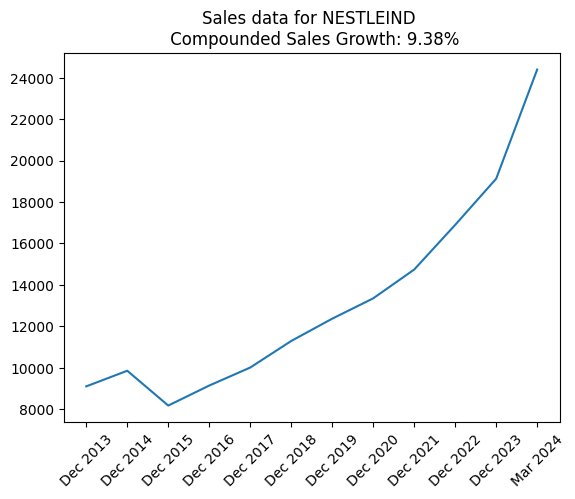

In [1566]:
# plot the sales data
import matplotlib.pyplot as plt

# show compunded_sales_growth in title
plt.title(f"Sales data for {company} \n Compounded Sales Growth: {compunded_sales_growth:.2f}%")

# for x-axis
plt.xticks(range(12), year_list, rotation=45)

plt.plot(sales_list)
plt.show()

In [1567]:
sales_list_mean = sales_list[:]
sales_list_max = sales_list[:]
sales_list_min = sales_list[:]
for i in range(5):
    sales_list_mean.append(sales_list_mean[-1] * (1 + compunded_sales_growth / 100))
    sales_list_max.append(sales_list_max[-1] * (1 + (compunded_sales_growth + 2*std_dev_sales) / 100))
    sales_list_min.append(sales_list_min[-1] * (1 + (compunded_sales_growth - 2*std_dev_sales) / 100))


In [1568]:
# extend the year_list
year_list_new = year_list[:]
last_year = int(year_list[-1].split()[1])
for i in range(1, 6):
    year_list_new.append(f'Predicted Mar {last_year+i}')  

In [1569]:
year_list_new

['Dec 2013',
 'Dec 2014',
 'Dec 2015',
 'Dec 2016',
 'Dec 2017',
 'Dec 2018',
 'Dec 2019',
 'Dec 2020',
 'Dec 2021',
 'Dec 2022',
 'Dec 2023',
 'Mar 2024',
 'Predicted Mar 2025',
 'Predicted Mar 2026',
 'Predicted Mar 2027',
 'Predicted Mar 2028',
 'Predicted Mar 2029']

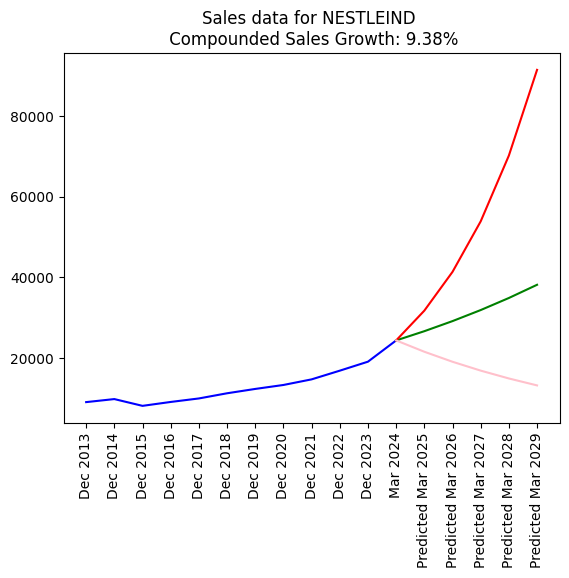

In [1570]:
import matplotlib.pyplot as plt
# plot 
plt.title(f"Sales data for {company} \n Compounded Sales Growth: {compunded_sales_growth:.2f}%")

# for x-axis
plt.xticks(range(17), year_list_new, rotation=90)

# change color to red for predicted data
plt.plot(sales_list[:12], color='blue')

# plot for only last 5 years

plt.plot(range(11,17),sales_list_mean[11:], color='green')
plt.plot(range(11,17),sales_list_max[11:], color='red')
plt.plot(range(11,17),sales_list_min[11:], color='pink')

plt.show()


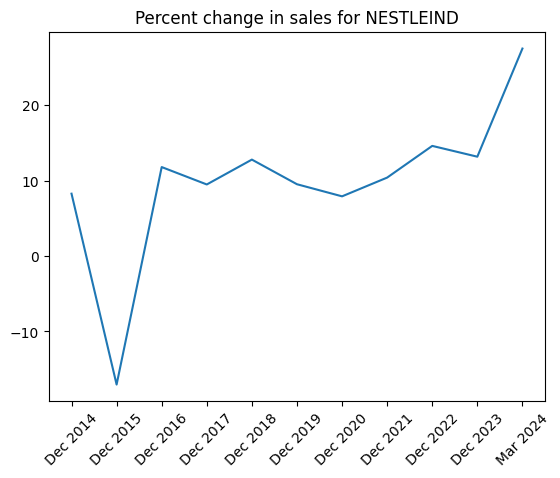

In [1571]:

# plot percent_change_sales
plt.title(f"Percent change in sales for {company}")
plt.xticks(range(11), year_list[1:], rotation=45)
plt.plot(percent_change_sales)
plt.show()


In [1572]:
operating_profit_list = []
for i in range(12):
    operating_profit_list.append(sales_list[i] - expenses_list[i])



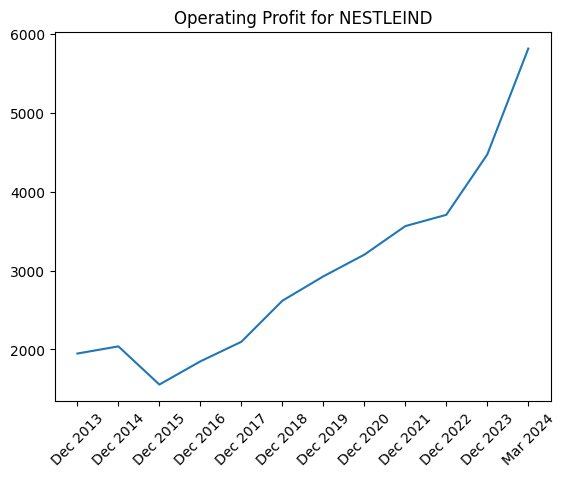

In [1573]:
# plot operating profit
plt.title(f"Operating Profit for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(operating_profit_list)
plt.show()


In [1574]:
sales_list

[9101,
 9855,
 8175,
 9141,
 10010,
 11292,
 12369,
 13350,
 14741,
 16897,
 19126,
 24394]

In [1575]:
operating_profit_margin_list = []
for i in range(12):
    operating_profit_margin_list.append(operating_profit_list[i] / sales_list[i] * 100)

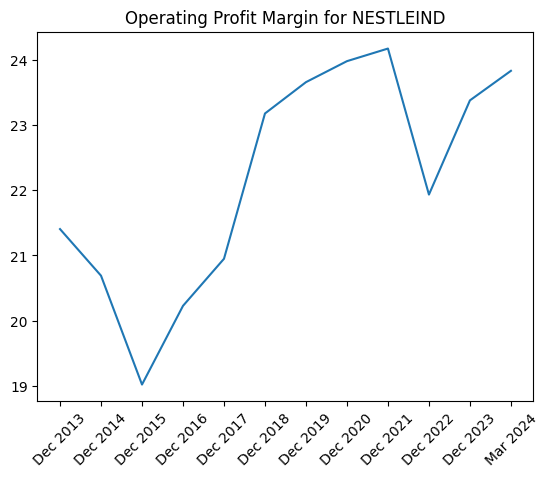

In [1576]:
# plot operating profit margin
plt.title(f"Operating Profit Margin for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(operating_profit_margin_list)
plt.show()


In [1577]:
cash_from_investing_list

[345, 415, 151, 207, 199, 166, 155, 478, 735, 550, 1371, 1883]

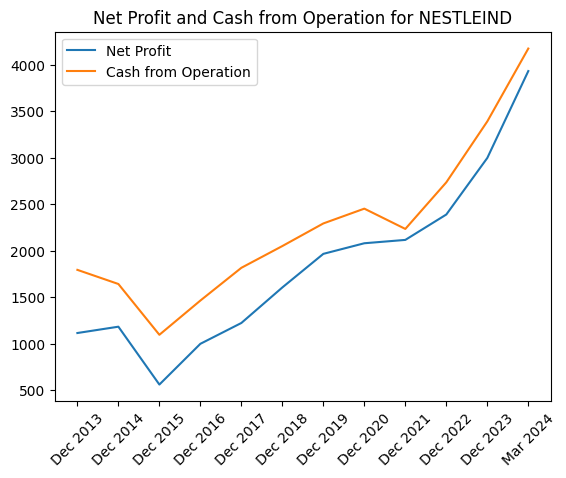

In [1578]:
# plot net_profit_list and cash_from_operation_list
plt.title(f"Net Profit and Cash from Operation for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(net_profit_list, label='Net Profit')
plt.plot(cash_from_operation_list, label='Cash from Operation')
plt.legend()
plt.show()



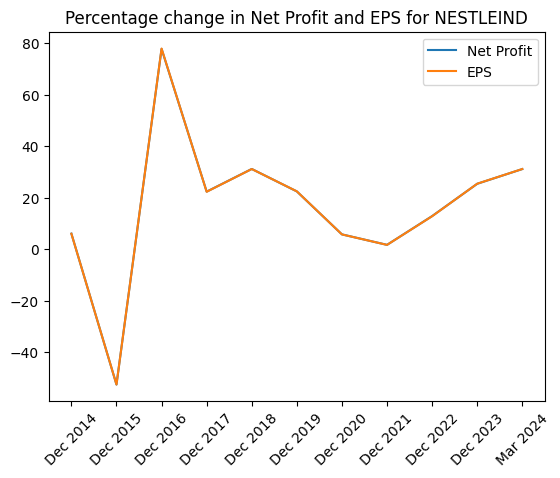

In [1579]:
# plotting percentage change in net profit and eps
percent_change_net_profit = []
for i in range(1, 12):
    percent_change_net_profit.append(((net_profit_list[i] - net_profit_list[i-1]) / net_profit_list[i-1]) * 100)

percent_change_eps = []
for i in range(1, 12):
    percent_change_eps.append(((eps[i] - eps[i-1]) / eps[i-1]) * 100)

plt.title(f"Percentage change in Net Profit and EPS for {company}")
plt.xticks(range(11), year_list[1:], rotation=45)
plt.plot(percent_change_net_profit, label='Net Profit')
plt.plot(percent_change_eps, label='EPS')
plt.legend()
plt.show()


In [1580]:
unit_net_profit_list = [1]
for i in percent_change_net_profit:
    unit_net_profit_list.append(unit_net_profit_list[-1] * (1 + i/100))

In [1581]:
unit_eps_change = [1]
for i in percent_change_eps:
    unit_eps_change.append(unit_eps_change[-1] * (1 + i/100))
    

In [1582]:
copy('\t'.join([str(i) for i in unit_eps_change]))

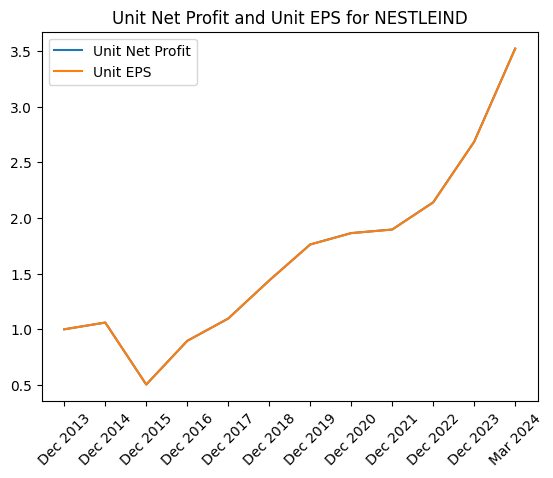

In [1583]:
# plot unit net profit and unit eps
plt.title(f"Unit Net Profit and Unit EPS for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(unit_net_profit_list, label='Unit Net Profit')
plt.plot(unit_eps_change, label='Unit EPS')
plt.legend()
plt.show()


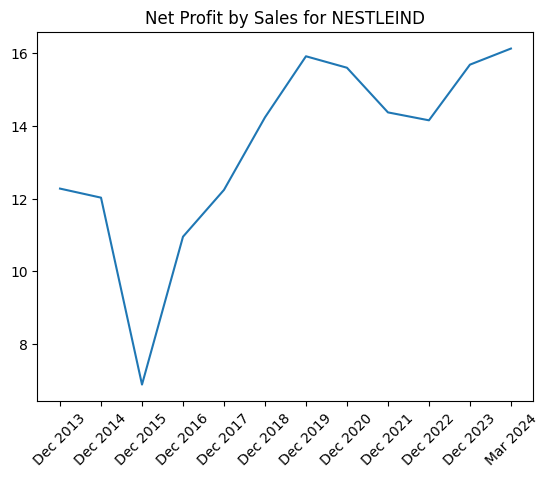

In [1584]:
# net_profit divided by sales graph
net_profit_by_sales = []
for i in range(12):
    net_profit_by_sales.append(net_profit_list[i] / sales_list[i] * 100)

plt.title(f"Net Profit by Sales for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(net_profit_by_sales)
plt.show()


In [1585]:
capex_by_income = sum(cash_from_investing_list) / sum(net_profit_list) * 100

In [1586]:
capex_by_income

29.992338546126458

In [1587]:
cash_from_investing_list

[345, 415, 151, 207, 199, 166, 155, 478, 735, 550, 1371, 1883]

In [1588]:
capex_list = []
for i in range(12):
    capex_list.append(cash_from_investing_list[i] / net_profit_list[i] * 100)


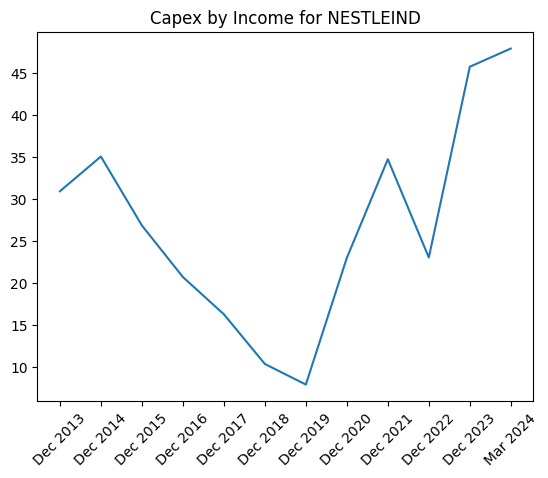

In [1589]:
plt.title(f"Capex by Income for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(capex_list)
plt.show()


In [1590]:
# return on assets
return_on_assets = []
for i in range(12):
    return_on_assets.append(net_profit_list[i] / total_assets[i] * 100)


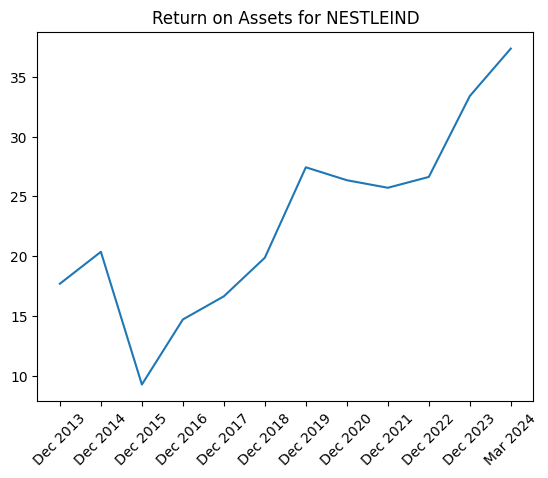

In [1591]:

plt.title(f"Return on Assets for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(return_on_assets)
plt.show()


In [1592]:
# return on equity
return_on_equity = []
for i in range(12):
    return_on_equity.append(net_profit_list[i] / equity[i] * 100)
    

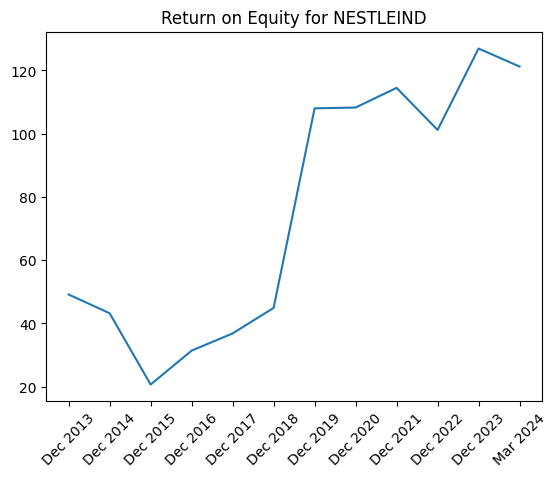

In [1593]:

plt.title(f"Return on Equity for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(return_on_equity)
plt.show()


In [1594]:
# cash equivalents by total_assets

cash_equivalents_by_total_assets = []
for i in range(12):
    cash_equivalents_by_total_assets.append(cash_equivalents[i] / total_assets[i] * 100)


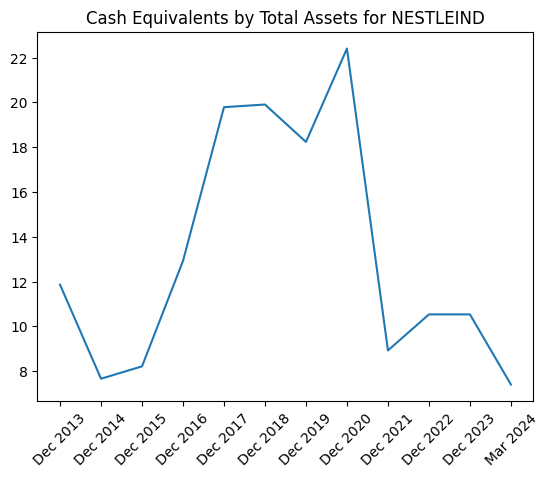

In [1595]:
plt.title(f"Cash Equivalents by Total Assets for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(cash_equivalents_by_total_assets)
plt.show()


In [1596]:
debt_to_equity = []
for i in range(12):
    debt_to_equity.append(borrowings[i] / equity[i])
    

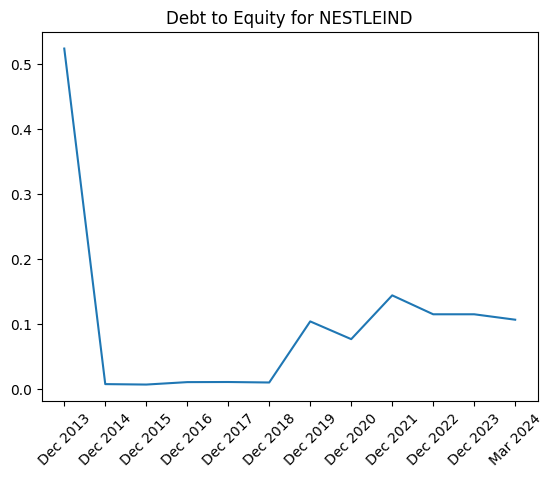

In [1597]:
plt.title(f"Debt to Equity for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(debt_to_equity)
plt.show()


In [1598]:
# trade receivables by total assests
trade_receivables_by_total_assets = []
for i in range(12):
    trade_receivables_by_total_assets.append(trade_receivables[i] / total_assets[i] * 100)


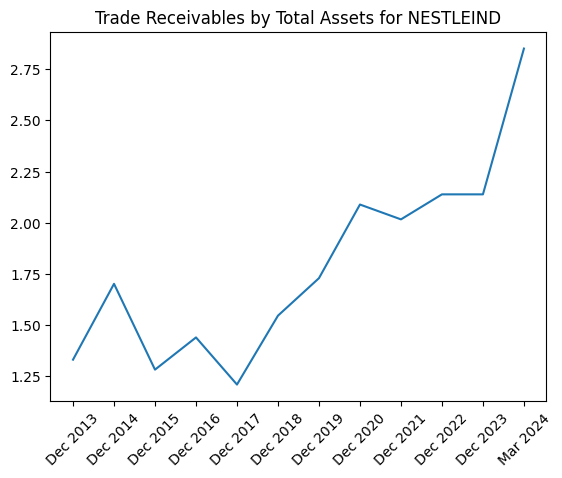

In [1599]:
plt.title(f"Trade Receivables by Total Assets for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(trade_receivables_by_total_assets)
plt.show()


In [1600]:
interest_by_sales = []
for i in range(12):
    interest_by_sales.append(interest_list[i] / sales_list[i] * 100)


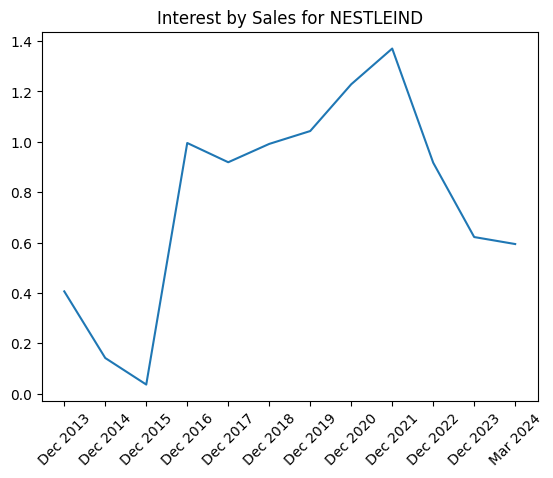

In [1601]:
plt.title(f"Interest by Sales for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(interest_by_sales)
plt.show()


In [1602]:
depreciation_by_sales = []
for i in range(12):
    depreciation_by_sales.append(depreciation_list[i] / sales_list[i] * 100)
   

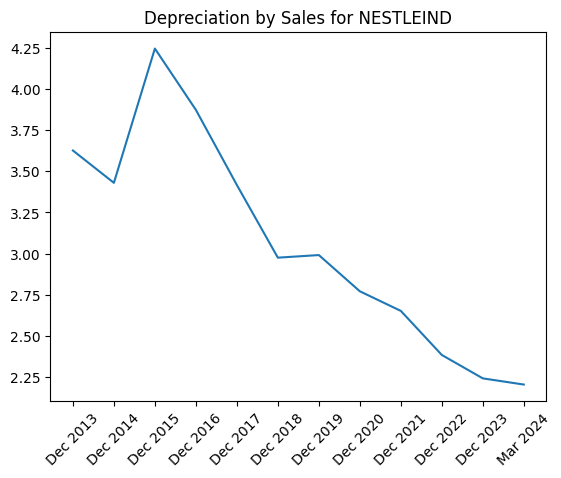

In [1603]:
plt.title(f"Depreciation by Sales for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(depreciation_by_sales)
plt.show()

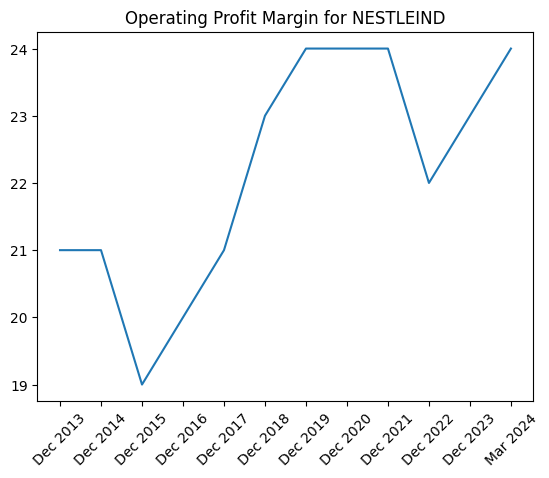

In [1604]:
# plot opm
plt.title(f"Operating Profit Margin for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(opm_percent_list)
plt.show()


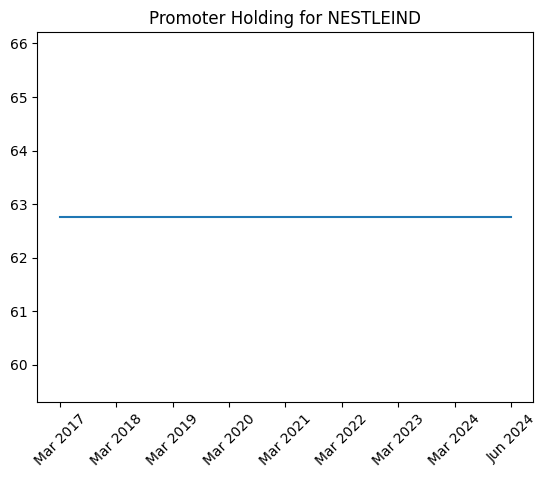

In [1605]:
# plot promoter holding
plt.title(f"Promoter Holding for {company}")
plt.xticks(range(len(promoter_holding_years)), promoter_holding_years, rotation=45)
plt.plot(promoter_holding)
plt.show()


In [1606]:
compounded_profit_growth = net_profit_list[-1] / net_profit_list[0]
compounded_profit_growth = compounded_profit_growth ** (1/len(net_profit_list)) - 1

In [1607]:
compounded_profit_growth *= 100

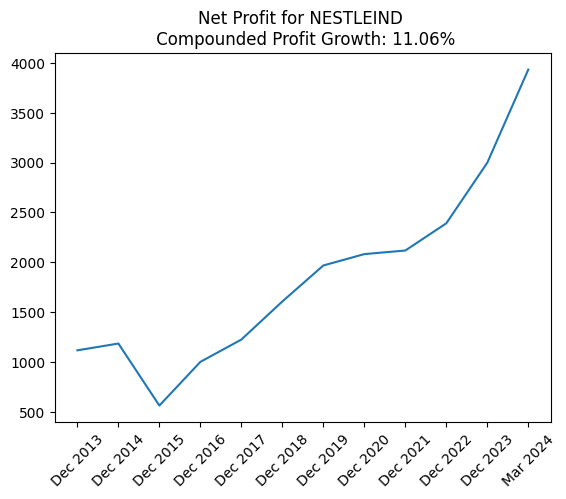

In [1608]:
# plot net profit
plt.title(f"Net Profit for {company} \n Compounded Profit Growth: {compounded_profit_growth:.2f}%")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(net_profit_list)
plt.show()